## Create a GitHub repository and attempt the following in Jupyter note book to create a business analyst portfolio. 

Use the coffee_company dataset set and analyse it using python. Below are sample insights that can be yielded from such data. Upon analysing the data, recommend which product should be continued and discontinued from the products sold.

Total sales across all the products is £14.78M
Highest sales are recorded in Quarter 4 of 2019 with a total sales of £4.12M
France performed the highest in sales with £3.32M in sales
The product coffee A generates the highest revenue with £4.8M worldwide
Coffee B generates the least revenue worldwide with £1.83M in revenue
Sales in enterprise segments generate negative revenue, whereas sales in government segment produce the highest revenue
Note: Do not limit yourself to the insights above.

In [1]:
import pandas as pd
data = pd.read_csv('Coffee_company.csv')
data.columns = data.columns.str.strip()
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Beverages,United States of America,Robusta,None,2427.75,$3.90,$26.00,"$42,081.00",$-,"$42,081.00","$21,040.50","$16,185.00",01/01/2021,1,January,2021
1,Beverages,Switzerland,Robusta,None,1981.50,$3.90,$26.00,"$34,346.00",$-,"$34,346.00","$17,173.00","$13,210.00",01/01/2021,1,January,2021
2,Snacks,Japan,Robusta,None,3267.00,$3.90,$19.50,"$42,471.00",$-,"$42,471.00","$28,314.00","$10,890.00",01/06/2021,6,June,2021
3,Snacks,Switzerland,Robusta,None,1332.00,$3.90,$19.50,"$17,316.00",$-,"$17,316.00","$11,544.00","$4,440.00",01/06/2021,6,June,2021
4,Snacks,Belgium,Robusta,None,3705.00,$3.90,$19.50,"$48,165.00",$-,"$48,165.00","$32,110.00","$12,350.00",01/06/2021,6,June,2021


# First we should round up Units sold

In [2]:
data['Units Sold'] = data['Units Sold'].astype(int)
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Beverages,United States of America,Robusta,None,2427,$3.90,$26.00,"$42,081.00",$-,"$42,081.00","$21,040.50","$16,185.00",01/01/2021,1,January,2021
1,Beverages,Switzerland,Robusta,None,1981,$3.90,$26.00,"$34,346.00",$-,"$34,346.00","$17,173.00","$13,210.00",01/01/2021,1,January,2021
2,Snacks,Japan,Robusta,None,3267,$3.90,$19.50,"$42,471.00",$-,"$42,471.00","$28,314.00","$10,890.00",01/06/2021,6,June,2021
3,Snacks,Switzerland,Robusta,None,1332,$3.90,$19.50,"$17,316.00",$-,"$17,316.00","$11,544.00","$4,440.00",01/06/2021,6,June,2021
4,Snacks,Belgium,Robusta,None,3705,$3.90,$19.50,"$48,165.00",$-,"$48,165.00","$32,110.00","$12,350.00",01/06/2021,6,June,2021


# Next we change the column name from 'Month Name' to 'Month' for easir readability

In [3]:
print(data.columns) # to check the exact name of each column
data.rename(columns={'Month Name':'Month'}, inplace = True)
data.head()

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month,Year
0,Beverages,United States of America,Robusta,None,2427,$3.90,$26.00,"$42,081.00",$-,"$42,081.00","$21,040.50","$16,185.00",01/01/2021,1,January,2021
1,Beverages,Switzerland,Robusta,None,1981,$3.90,$26.00,"$34,346.00",$-,"$34,346.00","$17,173.00","$13,210.00",01/01/2021,1,January,2021
2,Snacks,Japan,Robusta,None,3267,$3.90,$19.50,"$42,471.00",$-,"$42,471.00","$28,314.00","$10,890.00",01/06/2021,6,June,2021
3,Snacks,Switzerland,Robusta,None,1332,$3.90,$19.50,"$17,316.00",$-,"$17,316.00","$11,544.00","$4,440.00",01/06/2021,6,June,2021
4,Snacks,Belgium,Robusta,None,3705,$3.90,$19.50,"$48,165.00",$-,"$48,165.00","$32,110.00","$12,350.00",01/06/2021,6,June,2021


First we can calculate the total sales

In [4]:
#data['Sales'] = pd.to_numeric(data['Sales'].str.replace(',', '').str.replace('$', ''), errors='coerce')
data['Sales'] = pd.to_numeric(data['Sales'].str.replace(',', '', regex=False).str.replace('$', '', regex=False), errors='coerce')
data['Sales'] = data['Sales'].astype(float)
total_sales = data['Sales'].sum()
print("Total Sales: $", total_sales)

Total Sales: $ 408015039.62999994


# Calculate quarterly sales

In [5]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Calculate quarterly sales
quarterly_sales = data['Sales'].resample('Q').sum().reset_index()
quarterly_sales.columns = ['Quarter', 'Total Sales']

print(quarterly_sales)


      Quarter  Total Sales
0  2021-03-31  25339798.91
1  2021-06-30  29502044.05
2  2021-09-30  26476111.84
3  2021-12-31  38686468.77
4  2022-03-31  17737859.24
5  2022-06-30  20651430.79
6  2022-09-30  18533278.28
7  2022-12-31  27080528.13
8  2023-03-31  43077658.04
9  2023-06-30  50153474.72
10 2023-09-30  45009390.08
11 2023-12-31  65766996.78


# These are numbers, lets try to plot them

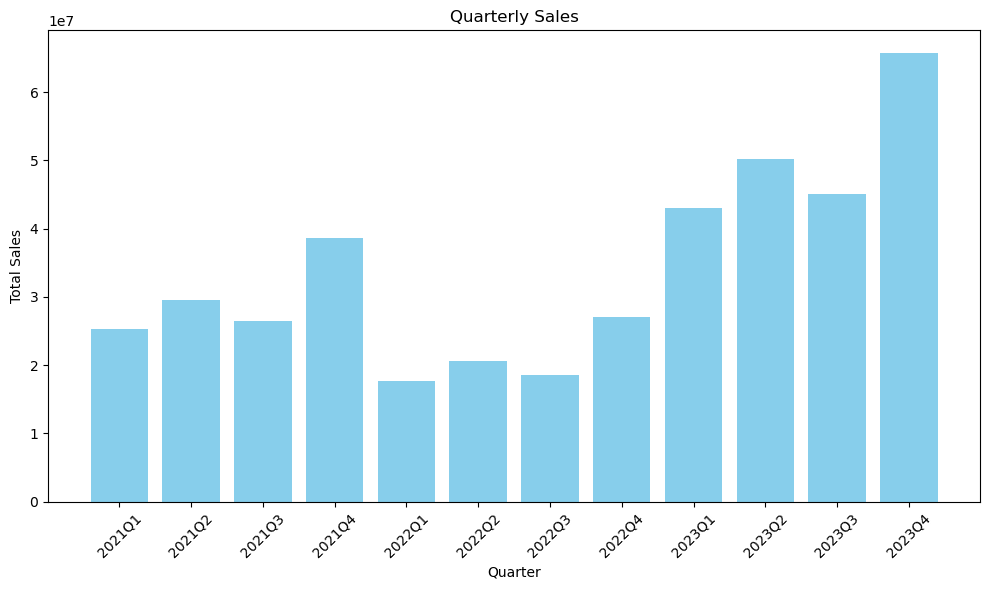

In [6]:
import matplotlib.pyplot as plt
# Plotting the quarterly sales as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(quarterly_sales['Quarter'].dt.to_period('Q').astype(str), quarterly_sales['Total Sales'], color='skyblue')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# We can add labels to our bar chart

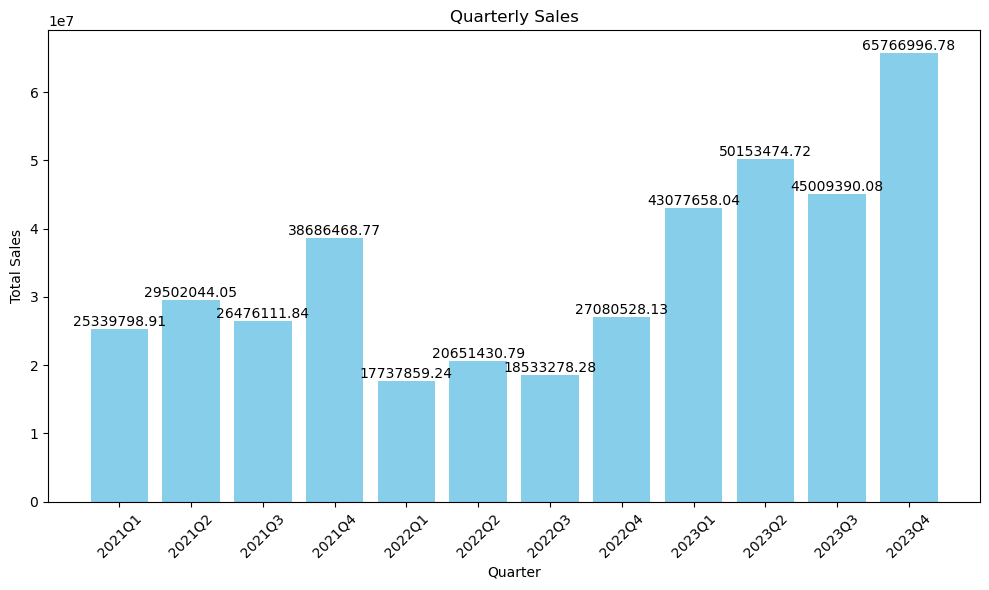

In [7]:
plt.figure(figsize=(10, 6))
bars = plt.bar(quarterly_sales['Quarter'].dt.to_period('Q').astype(str), quarterly_sales['Total Sales'], color='skyblue')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quarter 4 of 2023 has the highest sales with  $65,766,996.78.

# Next we check the impact of each product

In [8]:
product_sales = data.groupby('Product')['Sales'].sum().reset_index()
print(product_sales)

                  Product         Sales
0                Arabica   6.678838e+07
1   Blue Mountain Coffee   1.197661e+08
2                Bourbon   5.327320e+07
3                Caturra   6.288769e+07
4                Robusta   5.484531e+07
5                 Typica   5.045438e+07


# We can plot this for better visualisation

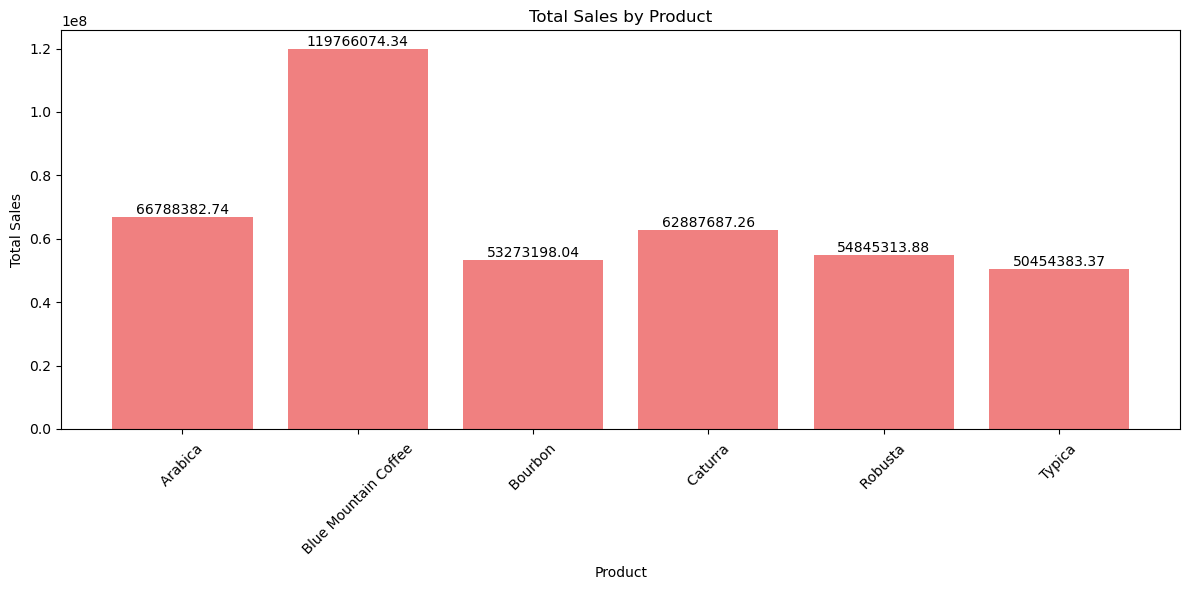

In [9]:
# Plotting the sales of products as a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(product_sales['Product'], product_sales['Sales'], color='lightcoral')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Blue mountain coffee yields the highest sales with $119 Million.

# While Typica yields the lowest sales with $50 Million in sales worldwide

# Next, we analyse sales by each segment

In [10]:
segment_sales = data.groupby('Segment')['Sales'].sum().reset_index()
print(segment_sales)

                       Segment         Sales
0                    Beverages  1.742301e+08
1               Dairy Products  6.199065e+06
2                 Frozen Foods  1.506877e+08
3  Packaged and Prepared Foods  6.878462e+07
4                       Snacks  8.113527e+06


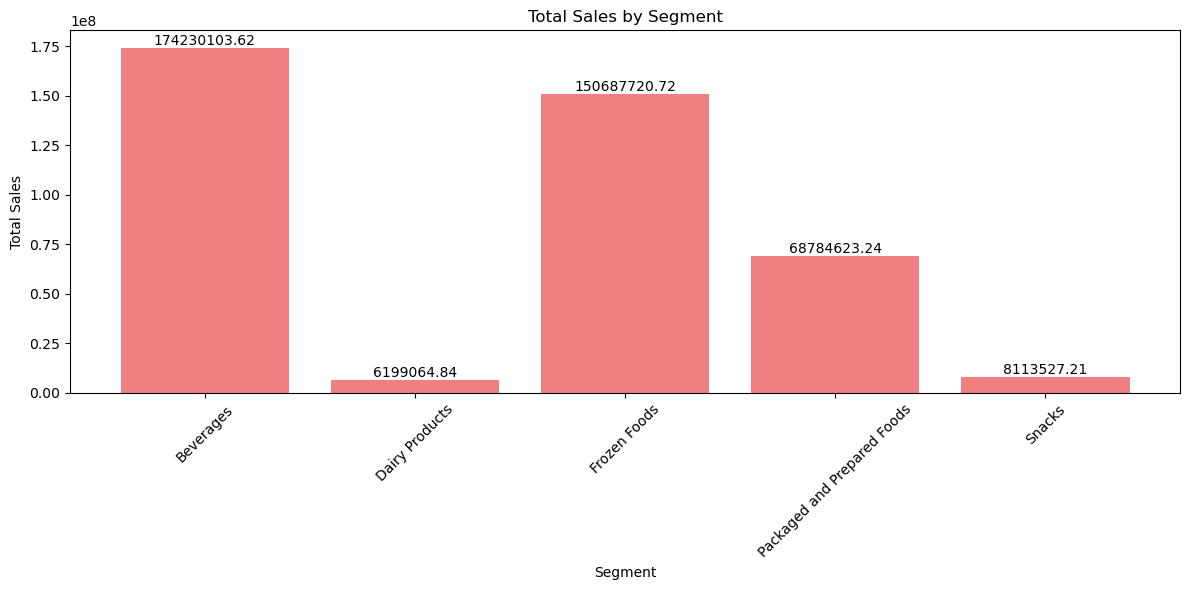

In [11]:
# Plotting the sales of products as a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(segment_sales['Segment'], segment_sales['Sales'], color='lightcoral')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

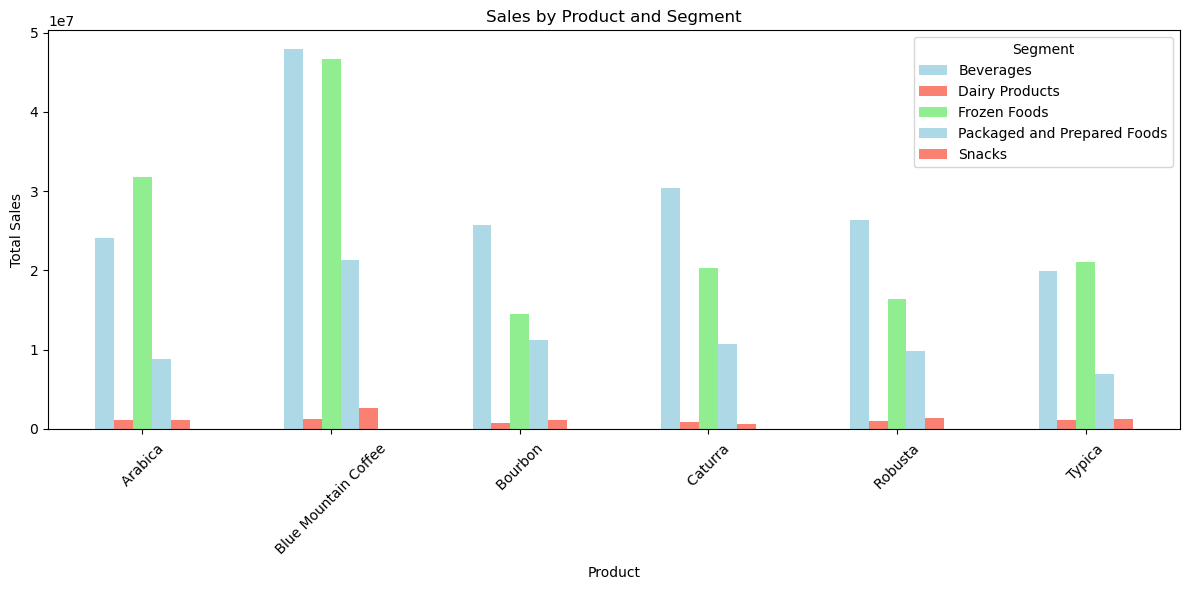

In [12]:
# Group by Product and Segment, then sum the sales
sales_by_product_segment = data.groupby(['Product', 'Segment'])['Sales'].sum().reset_index()

# Pivot the DataFrame for plotting
pivot_table = sales_by_product_segment.pivot(index='Product', columns='Segment', values='Sales').fillna(0)

# Plotting the grouped bar chart
ax = pivot_table.plot(kind='bar', figsize=(12, 6), color=['lightblue', 'salmon', 'lightgreen'])
plt.title('Sales by Product and Segment')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Segment')

# Adding data labels
#for container in ax.containers:
#    for bar in container:
#        height = bar.get_height()
#        ax.annotate(f'{height:.2f}',  # Format the height to 2 decimal places
#                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Positioning the label
#                    ha='center', va='bottom')  # Center the label above the bar

plt.tight_layout()
plt.show()

# We can go a step further by viewing sales per country
To improve visualisation, we can use  geopandas. Use the following to install it in your system
conda install --channel conda-forge geopandas

In [13]:
import geopandas as gpd
country_sales = data.groupby('Country')['Sales'].sum().reset_index()

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the sales data with the world map
world_sales = world.merge(country_sales, how="left", left_on="name", right_on="Country")

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_sales.boundary.plot(ax=ax, linewidth=1)
world_sales.plot(column='Sales', ax=ax, legend=True,
                 legend_kwds={'label': "Total Sales by Country",
                              'orientation': "horizontal"},
                 cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "No Sales Data"})

plt.title('Sales Performance by Country')
plt.show()

ModuleNotFoundError: No module named 'geopandas'

#Next we can plot monthly sales to visualise our data.

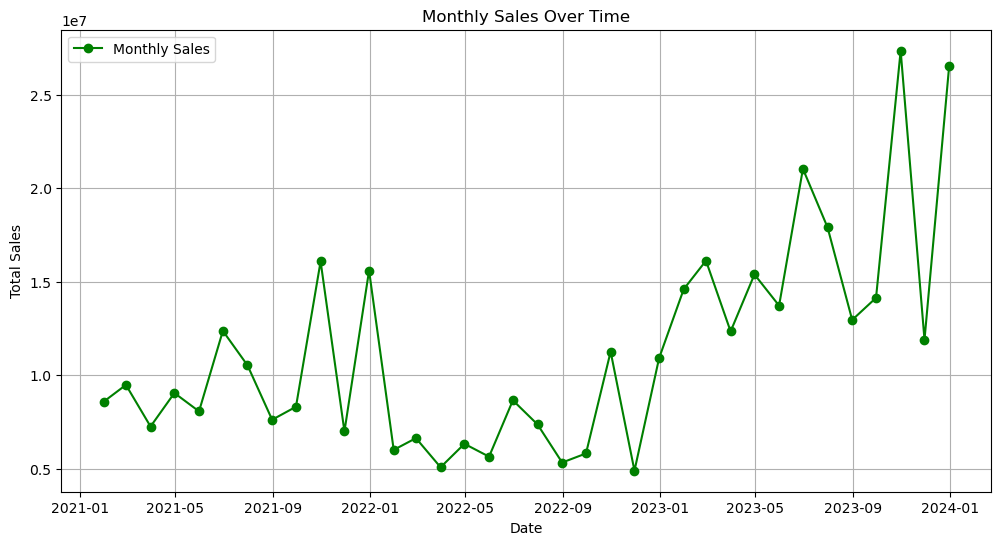

In [14]:
# Calculate monthly sales by resampling
monthly_sales = data['Sales'].resample('M').sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales']

# Plot monthly sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker='o', linestyle='-', color='g', label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()



# # We can try exponential smoothing

C:\Users\phdam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


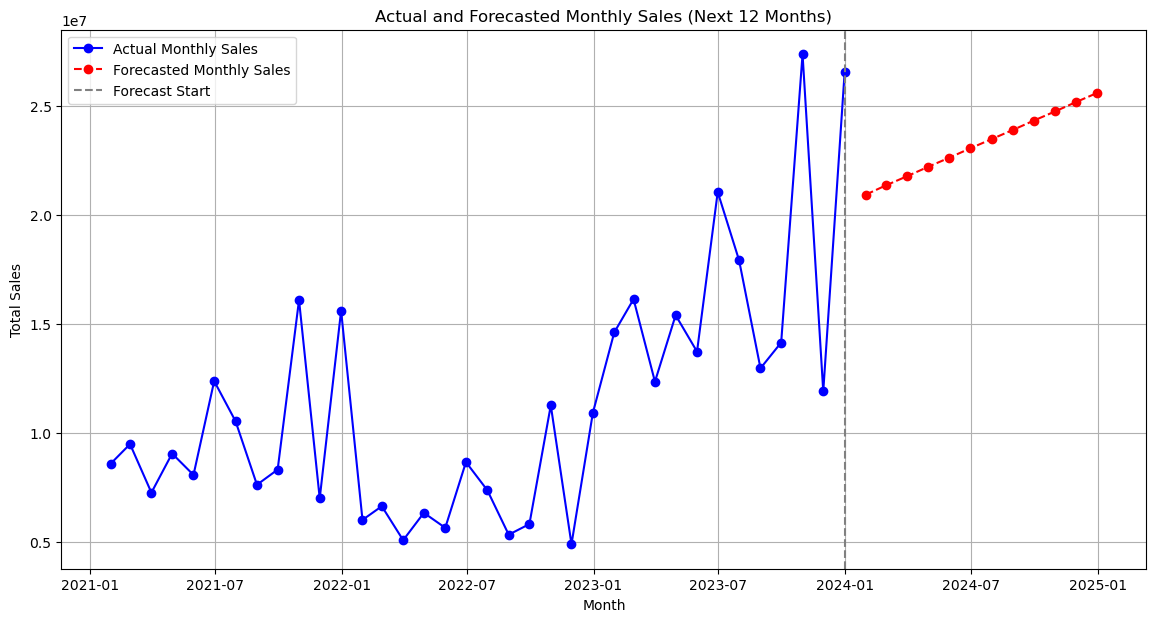

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Step 1: Calculate monthly sales
monthly_sales = data['Sales'].resample('M').sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales']

# Step 2: Apply the Exponential Smoothing Model
model = ExponentialSmoothing(
    monthly_sales['Total Sales'], 
    trend="additive", 
    seasonal=None
)
fit = model.fit()

# Step 3: Forecast for the next 12 months
forecast_periods = 12
forecast = fit.forecast(forecast_periods)

# Step 4: Prepare DataFrame for Forecasted Periods
last_date = monthly_sales['Month'].iloc[-1]
forecast_dates = pd.date_range(last_date + pd.offsets.MonthEnd(1), periods=forecast_periods, freq='M')
forecast_df = pd.DataFrame({'Month': forecast_dates, 'Total Sales': forecast})

# Step 5: Combine Actual and Forecasted Data
all_data = pd.concat([
    monthly_sales,
    forecast_df
]).reset_index(drop=True)

# Step 6: Plot Actual and Forecasted Sales
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], label='Actual Monthly Sales', marker='o', color='b')
plt.plot(forecast_df['Month'], forecast_df['Total Sales'], label='Forecasted Monthly Sales', marker='o', linestyle='--', color='r')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Forecast Start')
plt.title('Actual and Forecasted Monthly Sales (Next 12 Months)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


# #  Our forecast looks linear. We should add seasonal variation and trend

C:\Users\phdam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


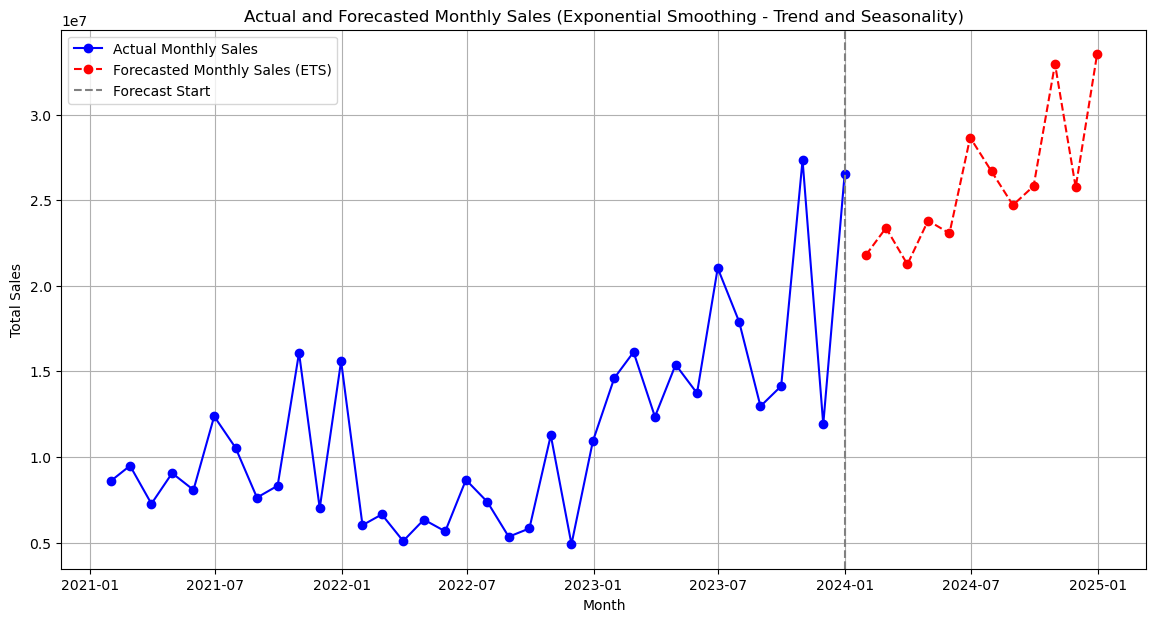

In [16]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Step 1: Prepare the monthly sales data
monthly_sales = data['Sales'].resample('M').sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales']

# Step 2: Apply Exponential Smoothing Model with Trend and Seasonality
model = ExponentialSmoothing(monthly_sales['Total Sales'], 
                              trend='add', 
                              seasonal='add', 
                              seasonal_periods=12)  # 12 periods for yearly seasonality
fit = model.fit()

# Step 3: Forecast the next 12 months
forecast_periods = 12
forecast = fit.forecast(forecast_periods)

# Step 4: Prepare the forecasted data
last_date = monthly_sales['Month'].iloc[-1]
forecast_dates = pd.date_range(last_date + pd.offsets.MonthEnd(1), periods=forecast_periods, freq='M')
forecast_df = pd.DataFrame({'Month': forecast_dates, 'Total Sales': forecast})

# Step 5: Combine the actual and forecasted data
all_data = pd.concat([monthly_sales[['Month', 'Total Sales']], forecast_df]).reset_index(drop=True)

# Step 6: Plot the actual and forecasted sales
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], label='Actual Monthly Sales', marker='o', color='b')
plt.plot(forecast_df['Month'], forecast_df['Total Sales'], label='Forecasted Monthly Sales (ETS)', marker='o', linestyle='--', color='r')
plt.axvline(x=monthly_sales['Month'].iloc[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('Actual and Forecasted Monthly Sales (Exponential Smoothing - Trend and Seasonality)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


# # This looks better. Feel free to explore other models and methods. 